# Assignment 2: Build a CNN for image recognition.

## Due Date:  March 26, 11:59PM

### Name: Shadi Ebadi


## Introduction:

1. In this assignment, you will build Convolutional Neural Network to classify CIFAR-10 Images.
2. You can directly load dataset from many deep learning packages.
3. You can use any deep learning packages such as pytorch, keras or tensorflow for this assignment.

## Requirements:

1. You need to load cifar 10 data and split the entire training dataset into training and validation.
2. You will implement a CNN model to classify cifar 10 images with provided structure.
3. You need to plot the training and validation accuracy or loss obtained from above step.
4. Then you can use tuned parameters to train using the entire training dataset.
5. You should report the testing accuracy using the model with complete data.
6. You may try to change the structure (e.g, add BN layer or dropout layer,...) and analyze your findings.

## Google Colab

- If you do not have GPU, the training of a CNN can be slow. Google Colab is a good option.

## Batch Normalization (BN)

### Background:

- Batch Normalization is a technique to speed up training and help make the model more stable.
- In simple words, batch normalization is just another network layer that gets inserted between a hidden layer and the next hidden layer. Its job is to take the outputs from the first hidden layer and normalize them before passing them on as the input of the next hidden layer.

- For more detailed information, you may refer to the original paper: https://arxiv.org/pdf/1502.03167.pdf.

### BN Algorithm:

- Input: Values of $x$ over a mini-batch: $\mathbf{B}$ = $\{x_1,..., x_m\};$
- Output: $\{y_i = BN_{\gamma,\beta}(x_i)\}$, $\gamma, \beta$ are learnable parameters

Normalization of the Input:
$$\mu_{\mathbf{B}} = \frac{1}{m}\sum_{i=1}^m x_i$$
$$\sigma_{\mathbf{B}}^2 = \frac{1}{m}\sum_{i=1}^m (x_i - \mu_{\mathbf{B}})^2$$
$$\hat{x_i} = \frac{x_i - \mu_{\mathbf{B}}}{\sqrt{\sigma_{\mathbf{B}}}^2 + \epsilon}$$
Re-scaling and Offsetting:
$$y_i = \gamma \hat{x_i} + \beta = BN_{\gamma,\beta}(x_i)$$


### Advantages of BN:
1. Improves gradient flow through the network.
2. Allows use of saturating nonlinearities and higher learning rates.
3. Makes weights easier to initialize.
4. Act as a form of regularization and may reduce the need for dropout.

### Implementation:

- The batch normalization layer has already been implemented in many packages. You may simply call the function to build the layer. For example: torch.nn.BatchNorm2d() using pytroch package, keras.layers.BatchNormalization() using keras package.
- The location of BN layer: Please make sure ```BatchNormalization``` is between a ```Conv```/```Dense``` layer and an ```activation``` layer.

## 1. Data preparation

In [8]:
pip install tensorflow==2.12 keras==2.12


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\sheba\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\sheba\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\sheba\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\sheba\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\sheba\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "C:\Users\sheba\anaconda3\lib\site-packages\pip\

In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np

C:\Users\sheba\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\sheba\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### 1.1. Load data


In [ ]:
from tensorflow import keras
import tensorflow as tf
import numpy as np

import h5py  


In [2]:
# Load Cifar-10 Data
# This is just an example, you may load dataset from other packages.
import keras
import numpy as np

# If you can not load keras dataset, un-comment these two lines.
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(np.max(y_train) - np.min(y_train) + 1))

170498071/170498071 [==============================] - 5s 0us/step
shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### 1.2. One-hot encode the labels (5 points)

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Implement a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [3]:
def to_one_hot(y, num_class=10):
    a=y.shape[0]
    
    zero_matrix =np.zeros((a,num_class)) 
    
    for i in range(a):
        j=y[i]

        zero_matrix[i,j]=1
        
        
    return zero_matrix
    


y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])


Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets (5 points)

Randomly partition the 50K training samples to 2 sets: 
* a training set containing 40K samples: x_tr, y_tr
* a validation set containing 10K samples: x_val, y_val


In [39]:

print('Shape of y_train_vec: ' + str(x_train.shape))


Shape of y_train_vec: (50000, 32, 32, 3)


In [4]:
import numpy as np


# Generate  random  indices
rand_indices = np.random.permutation(50000)

# Splitting indices into training and validation sets
train_indices = rand_indices[0:40000]  #  40,000 for training
valid_indices = rand_indices[40000:] #  10,000 for validation

# Create validation data
x_valid_vec = x_train[valid_indices, :, :, :] 
y_valid_vec = y_train_vec[valid_indices, :]

# Create training data
x_train_vec = x_train[train_indices, :, :, :]
y_train_vec = y_train_vec[train_indices, :]

#  Print the shapes of the resulting sets
print('Shape of x_valid_vec:', x_valid_vec.shape)
print('Shape of y_valid_vec:', y_valid_vec.shape)
print('Shape of x_train_vec:', x_train_vec.shape)
print('Shape of y_train_vec:', y_train_vec.shape)

Shape of x_valid_vec: (10000, 32, 32, 3)
Shape of y_valid_vec: (10000, 10)
Shape of x_train_vec: (40000, 32, 32, 3)
Shape of y_train_vec: (40000, 10)


## 2. Build a CNN and tune its hyper-parameters (50 points)

- Build a convolutional neural network model using the below structure:

- It should have a structure of: Conv - ReLU - Max Pool - ConV - ReLU - Max Pool - Dense - ReLU - Dense - Softmax

- In the graph 3@32x32 means the dimension of input image, 32@30x30 means it has 32 filters and the dimension now becomes 30x30 after the convolution.
- All convolutional layers (Conv) should have stride = 1 and no padding.
- Max Pooling has a pool size of 2 by 2.




<img src="network.PNG"/>

- You may use the validation data to tune the hyper-parameters (e.g., learning rate, and optimization algorithm)
- Do NOT use test data for hyper-parameter tuning!!!
- Try to achieve a validation accuracy as high as possible.

In [6]:
# Build the model


from keras import models
from keras import layers
model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (4,4), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])




In [7]:
# Define model optimizer and loss function
from keras.optimizers import RMSprop

optimizer = RMSprop(learning_rate=0.0001) 

model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
# Train the model and store model parameters/loss values
history = model.fit(x_train_vec, y_train_vec, batch_size=128, epochs=50, validation_data=(x_valid_vec, y_valid_vec))

Epoch 1/50
313/313 [==============================] - 37s 114ms/step - loss: 4.3361 - accuracy: 0.2684 - val_loss: 1.9172 - val_accuracy: 0.3705
Epoch 2/50
313/313 [==============================] - 37s 117ms/step - loss: 1.6303 - accuracy: 0.4374 - val_loss: 1.5300 - val_accuracy: 0.4687
Epoch 3/50
313/313 [==============================] - 36s 115ms/step - loss: 1.3402 - accuracy: 0.5330 - val_loss: 1.4131 - val_accuracy: 0.5105
Epoch 4/50
313/313 [==============================] - 36s 115ms/step - loss: 1.1661 - accuracy: 0.5962 - val_loss: 1.4264 - val_accuracy: 0.5265
Epoch 5/50
313/313 [==============================] - 35s 110ms/step - loss: 1.0350 - accuracy: 0.6414 - val_loss: 1.3559 - val_accuracy: 0.5436
Epoch 6/50
313/313 [==============================] - 34s 109ms/step - loss: 0.9284 - accuracy: 0.6820 - val_loss: 1.2664 - val_accuracy: 0.5789
Epoch 7/50
313/313 [==============================] - 35s 113ms/step - loss: 0.8322 - accuracy: 0.7142 - val_loss: 1.2688 - val_ac

## 3. Plot the training and validation loss curve versus epochs. (5 points)

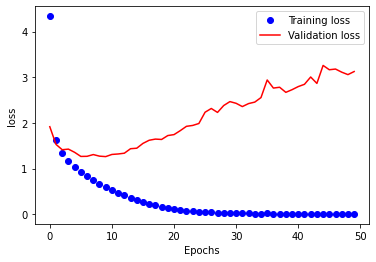

In [9]:
# Plot the loss curve

import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(50)  
train_acc = history.history['loss']
valid_acc = history.history['val_loss']

plt.plot(epochs, train_acc, 'bo', label='Training loss')
plt.plot(epochs, valid_acc, 'r', label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('loss')

plt.legend()
plt.show()

I wrote a function for the cnn model  and used it in loop for finding the best hyperparameters
(learning rate and optimizer)

In [45]:


def build_model(optimizer, learning_rate):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (4,4), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
   
    model.compile(optimizer=optimizer(learning_rate=learning_rate), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    history = model.fit(x_train_vec, y_train_vec, epochs=5, validation_data=(x_valid_vec, y_valid_vec), verbose=0)

    return history.history['val_accuracy'][-1] 
                           
                  

In [41]:
                  
optimizers = [keras.optimizers.Adam, keras.optimizers.SGD, keras.optimizers.RMSprop]
learning_rates = [0.001, 0.0005, 0.0001]

In [20]:
best_accuracy=0
best_param={}

for i in optimizers:
    for j in learning_rates:
        accuracy=build_model(i, j)
        
        if accuracy>best_accuracy:
            best_accuracy=accuracy
            best_param={'optimizer': i, 'learning_rate': j}
            
print(f"\nBest Hyperparameters: {best_param}, Best Accuracy: {best_accuracy:.4f}")


            
        


Best Hyperparameters: {'optimizer': <class 'keras.optimizers.legacy.adam.Adam'>, 'learning_rate': 0.0005}, Best Accuracy: 0.6236


## 4. Train (again) and evaluate the model (5 points)

- To this end, you have found the "best" hyper-parameters. 
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [21]:
#<Compile your model again (using the same hyper-parameters you tuned above)>
#<Train your model on the entire training set (50K samples)>


model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

y_train_vec_1 = to_one_hot(y_train)

history = model.fit(x_train, y_train_vec_1, batch_size=128, epochs=50)


Epoch 1/50
391/391 [==============================] - 52s 129ms/step - loss: 0.7503 - accuracy: 0.8014
Epoch 2/50
391/391 [==============================] - 51s 130ms/step - loss: 0.4194 - accuracy: 0.8686
Epoch 3/50
391/391 [==============================] - 48s 122ms/step - loss: 0.2881 - accuracy: 0.9049
Epoch 4/50
391/391 [==============================] - 47s 120ms/step - loss: 0.2362 - accuracy: 0.9201
Epoch 5/50
391/391 [==============================] - 49s 126ms/step - loss: 0.1967 - accuracy: 0.9339
Epoch 6/50
391/391 [==============================] - 48s 123ms/step - loss: 0.1842 - accuracy: 0.9374
Epoch 7/50
391/391 [==============================] - 49s 125ms/step - loss: 0.1543 - accuracy: 0.9481
Epoch 8/50
391/391 [==============================] - 48s 122ms/step - loss: 0.1438 - accuracy: 0.9509
Epoch 9/50
391/391 [==============================] - 50s 129ms/step - loss: 0.1408 - accuracy: 0.9536
Epoch 10/50
391/391 [==============================] - 50s 128ms/step - l

## 5. Evaluate the model on the test set (5 points)

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [31]:
# Evaluating  model performance  on testing data.
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

y_test_vec_1 = to_one_hot(y_test)

test_loss, test_acc = model.evaluate(x_test, y_test_vec_1, verbose=2)


313/313 - 6s - loss: 1.8627e-04 - accuracy: 1.0000 - 6s/epoch - 18ms/step


## 6. Building model with new structure (25 points)
- In this section, you can build your model with adding new layers (e.g, BN layer or dropout layer, ...)
- If you want to regularize a ```Conv/Dense layer```, you should place a ```Dropout layer``` before the ```Conv/Dense layer```.
- You can try to compare their loss curve and testing accuracy and analyze your findings.
- You need to try at lease two different structures.

The batch normalization layer has already been implemented in many packages. You may simply call the function to build the layer. For example: torch.nn.BatchNorm2d() using pytroch package, keras.layers.BatchNormalization() using keras package.
The location of BN layer: Please make sure BatchNormalization is between a Conv/Dense layer and an activation layer.

In [32]:
from keras import models
from keras import layers
from keras.optimizers import Adam

# Build the model
model_1 = models.Sequential([
    layers.Conv2D(32, (3,3), activation=None, input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (4,4), activation=None),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_1.compile(optimizer=Adam(learning_rate=0.0005),
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

# Convert y_train to one-hot encoding
y_train_vec_1 = to_one_hot(y_train)

# Train the model
history_1 = model_1.fit(x_train, y_train_vec_1, batch_size=128, epochs=50)


Epoch 1/50
391/391 [==============================] - 76s 189ms/step - loss: 1.5915 - accuracy: 0.4297
Epoch 2/50
391/391 [==============================] - 73s 186ms/step - loss: 1.2201 - accuracy: 0.5621
Epoch 3/50
391/391 [==============================] - 74s 188ms/step - loss: 1.0733 - accuracy: 0.6198
Epoch 4/50
391/391 [==============================] - 72s 183ms/step - loss: 0.9851 - accuracy: 0.6534
Epoch 5/50
391/391 [==============================] - 72s 184ms/step - loss: 0.9189 - accuracy: 0.6773
Epoch 6/50
391/391 [==============================] - 73s 187ms/step - loss: 0.8652 - accuracy: 0.6947
Epoch 7/50
391/391 [==============================] - 71s 182ms/step - loss: 0.8224 - accuracy: 0.7102
Epoch 8/50
391/391 [==============================] - 71s 183ms/step - loss: 0.7816 - accuracy: 0.7242
Epoch 9/50
391/391 [==============================] - 73s 187ms/step - loss: 0.7463 - accuracy: 0.7377
Epoch 10/50
391/391 [==============================] - 73s 188ms/step - l

In [44]:
# Evaluating  model performance  on testing data.
model_1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

y_test_vec_1 = to_one_hot(y_test)

test_loss, test_acc = model_1.evaluate(x_test, y_test_vec_1, verbose=2)


313/313 - 7s - loss: 0.8775 - accuracy: 0.7557 - 7s/epoch - 22ms/step


Second Structure

In [34]:
from keras import models
from keras import layers
from keras.optimizers import Adam
from keras.utils import to_categorical

# Build the model
model_2 = models.Sequential([
    layers.Conv2D(32, (3,3), activation=None, input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (4,4), activation=None),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_2.compile(optimizer=Adam(learning_rate=0.0005),
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

# Convert y_train to one-hot encoding
y_train_vec_1 = to_one_hot(y_train)

# Train the model
history_2 = model_2.fit(x_train, y_train_vec_1, batch_size=128, epochs=50)


Epoch 1/50
391/391 [==============================] - 57s 145ms/step - loss: 1.3589 - accuracy: 0.5175
Epoch 2/50
391/391 [==============================] - 57s 145ms/step - loss: 0.9875 - accuracy: 0.6527
Epoch 3/50
391/391 [==============================] - 57s 145ms/step - loss: 0.8493 - accuracy: 0.7022
Epoch 4/50
391/391 [==============================] - 57s 145ms/step - loss: 0.7563 - accuracy: 0.7380
Epoch 5/50
391/391 [==============================] - 57s 145ms/step - loss: 0.6806 - accuracy: 0.7646
Epoch 6/50
391/391 [==============================] - 59s 151ms/step - loss: 0.6118 - accuracy: 0.7860
Epoch 7/50
391/391 [==============================] - 59s 150ms/step - loss: 0.5629 - accuracy: 0.8046
Epoch 8/50
391/391 [==============================] - 58s 150ms/step - loss: 0.5105 - accuracy: 0.8227
Epoch 9/50
391/391 [==============================] - 57s 146ms/step - loss: 0.4571 - accuracy: 0.8411
Epoch 10/50
391/391 [==============================] - 57s 145ms/step - l

In [35]:
# Evaluating model performance on testing data.
model_2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

y_test_vec_1 = to_one_hot(y_test)

test_loss_2, test_acc_2 = model_2.evaluate(x_test, y_test_vec_1, verbose=2)


313/313 - 8s - loss: 1.7881 - accuracy: 0.7152 - 8s/epoch - 25ms/step


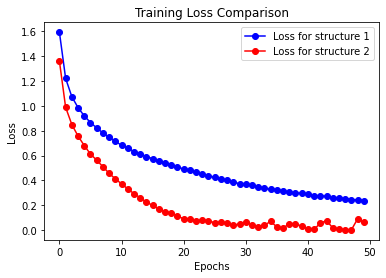

In [43]:
import matplotlib.pyplot as plt
# Plot the loss curve


# Extract loss values
epochs = range(50) 

train_loss_1 = history_1.history['loss']
train_loss_2 = history_2.history['loss']

# Plot training loss for both structures
plt.plot(epochs, train_loss_1, 'bo-', label='Loss for structure 1')
plt.plot(epochs, train_loss_2, 'ro-', label='Loss for structure 2')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')

plt.legend()
plt.show()


Structure 2 has better regularization. ( only using BN and not drop out)